In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Linear Regression Review

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [2]:
x_mean = 70
x_sd = 10
y_mean = 50
y_sd = 12
r = 0.75

In [3]:
midterm_score = 90
x = midterm_score
(((x - x_mean) / x_sd) * r * y_sd) + y_mean

68.0

In [4]:
midterm_score = 60
x = midterm_score
(((x - x_mean) / x_sd) * r * y_sd) + y_mean

41.0

In [5]:
# y = a * x + b
a = r * (y_sd / x_sd)
b = y_mean - a * x_mean

In [6]:
a * 90 + b

68.0

In [7]:
a * 60 + b

41.0

## Linear Regression Example

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [8]:
little_women = Table.read_table('little_women.csv')
little_women = little_women.move_to_start('Periods')
little_women.show(3)

Periods,Characters
189,21759
188,22148
231,20558


In [9]:
def standard_units(any_numbers):
    """Convert any array of numbers to standard units."""
    return (any_numbers - np.average(any_numbers)) / np.std(any_numbers)

def correlation(t, x, y):
    """Return the correlation coefficient (r) of two variables."""
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

def slope(t, x, y):
    """The slope of the regression line (original units)."""
    r = correlation(t, x, y)
    return r * np.std(t.column(y)) / np.std(t.column(x))

def intercept(t, x, y):
    """The intercept of the regression line (original units)."""
    return np.mean(t.column(y)) - slope(t, x, y) * np.mean(t.column(x))

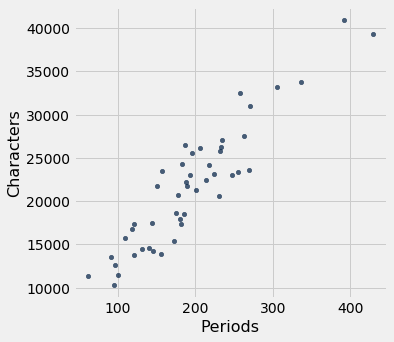

In [10]:
little_women.scatter(0, 1)

In [11]:
correlation(little_women, 0, 1)

0.9229576895854816

In [12]:
a = slope(little_women, 0, 1)
b = intercept(little_women, 0, 1)
a * little_women.column(0) + b

array([21183.59679439, 21096.61895313, 24836.66612724, 21705.46384194,
       26924.13431744, 16921.68257274, 16138.88200141, 23358.04282585,
       34056.31730062, 20835.68542936, 21531.50815943, 42058.27869638,
       19965.90701678, 20400.79622307, 20487.77406433, 19704.973493  ,
       18226.35019161, 17269.59393777, 15269.10358883, 17356.57177903,
       28141.82409506, 15182.12574757, 26228.31158737, 20574.75190559,
       12659.76835108, 17791.46098532, 14225.36949373, 28315.77977757,
       25010.62180976, 23705.95419088, 20226.84054055, 24227.82123843,
       24923.6439685 , 27098.08999996, 22227.33088949, 13442.5689224 ,
       18400.30587413, 22662.22009578, 27619.95704751, 10050.43311333,
       21009.64111188, 15008.17006505, 31273.02638036, 13007.67971611,
       13094.65755737, 25097.59965102, 38840.09856983])

In [13]:
def linear_fit(t, x, y):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * t.column(x) + b

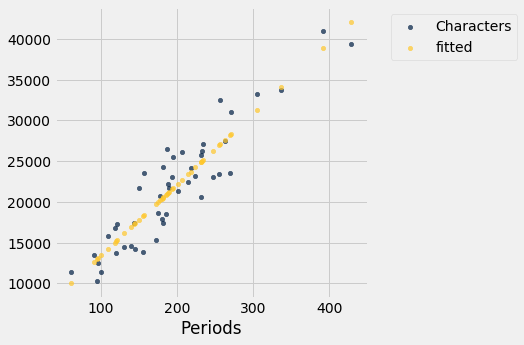

In [14]:
lw_fitted = little_women.with_column(
    'fitted',
    linear_fit(little_women, 0, 1)
)
lw_fitted.scatter(0)

### Squared Error

In [15]:
sample = [[131, 14431], [231, 20558], [392, 40935], [157, 23524]]
def lw_errors(slope, intercept):
    print('Slope:    ', np.round(slope), 'characters per period')
    print('Intercept:', np.round(intercept), 'characters')
    little_women.scatter('Periods', 'Characters')
    xlims = np.array([50, 450])
    plots.plot(xlims, slope * xlims + intercept, lw=2)
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=2)

Slope:     50 characters per period
Intercept: 1000 characters


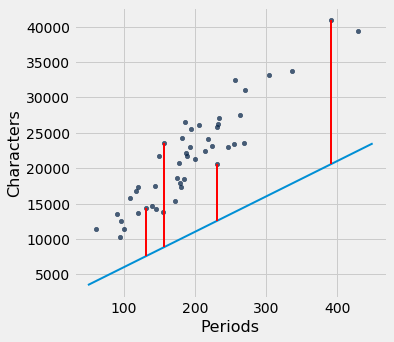

In [17]:
lw_errors(50, 1000)

Slope:     -50 characters per period
Intercept: 20000 characters


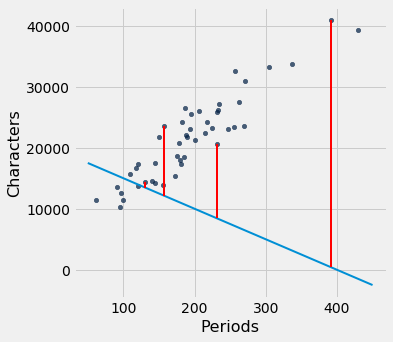

In [18]:
lw_errors(-50, 20000)

In [19]:
def lw_rmse(slope, intercept):
    lw_errors(slope, intercept)
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    predicted = slope * x + intercept
    mse = np.mean((y - predicted) ** 2)
    print("Root mean squared error:", mse ** 0.5)

Slope:     50 characters per period
Intercept: 10000 characters
Root mean squared error: 4322.167831766537


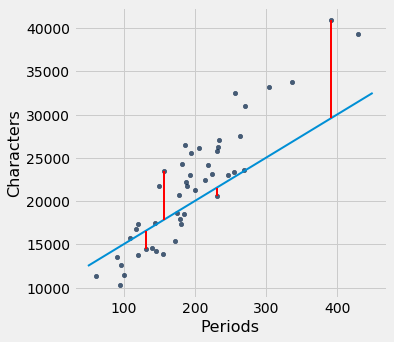

In [20]:
lw_rmse(50, 10000)

Slope:     -50 characters per period
Intercept: 20000 characters
Root mean squared error: 15556.958991519832


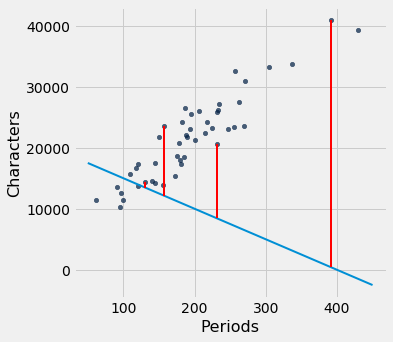

In [21]:
lw_rmse(-50, 20000)

Slope:     90 characters per period
Intercept: 4000 characters
Root mean squared error: 2715.5391063834586


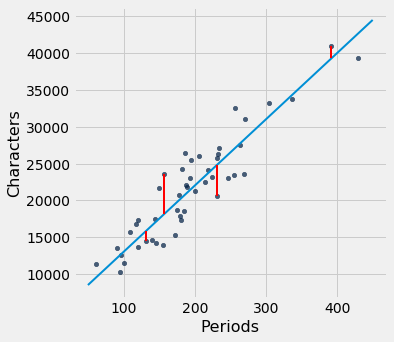

In [22]:
lw_rmse(90, 4000)

### Muqadder's Notes:

We will see below that the Regression line (we calculate using the method developed in earliler lecture) will give the LOWEST root mean square error (RMSE) for a given data set. In other words, the Regression line minimizes the mean squared error for the given set of data.

Slope:     87.0 characters per period
Intercept: 4745.0 characters
Root mean squared error: 2701.690785311856


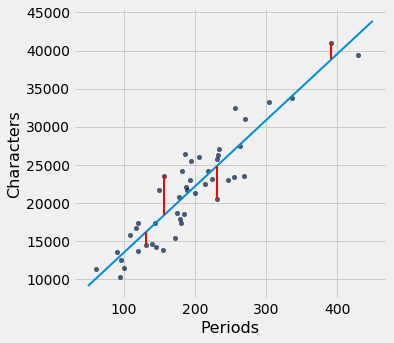

In [23]:
lw_rmse(slope(little_women, 0, 1), intercept(little_women, 0, 1))

## Least Squares

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

#### Muqadder's Notes: The Leas Squares method gives us yet another way to find the regression line. 

In [24]:
def f(x):
    return (x - 3) ** 2 + 1

In [25]:
[f(1), f(2), f(3), f(4), f(5)]

[5, 2, 1, 2, 5]

In [26]:
minimize(f)

2.999999999968361

In [27]:
f(minimize(f))

1.0

In [28]:
f(3)

1

In [29]:
f(3.1)

1.01

In [30]:
f(2.9)

1.01

In [31]:
def lw_mse(any_slope, any_intercept):
    x = little_women.column(0)
    y = little_women.column(1)
    predicted = any_slope * x + any_intercept
    return np.mean((y - predicted) ** 2)

Slope:     50 characters per period
Intercept: 10000 characters
Root mean squared error: 4322.167831766537


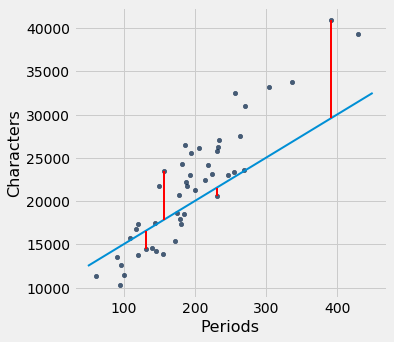

In [32]:
lw_rmse(50, 10000)

In [33]:
lw_mse(50, 10000) ** 0.5

4322.167831766537

#### Muqadder's notes: Minimize function will minimize ANY function, without having to know any specifics about the correlation coefficient or the standard units. This is a very powerful approach to finding best-fit models in machine learning!!

In [36]:
minimize(lw_mse)

array([  86.97784117, 4744.78484535])

#### Muqadder's notes: The slope and intercept found by the minimize function above will be very close to the slope and intercept we found by using the traditional approach (involving r and standard units of x and y)!! This technique requires no computation of r or any other metric to find the regression line! See below:-

In [39]:
slope(little_women, 0, 1)

86.97784125829821

In [40]:
intercept(little_women, 0, 1)

4744.784796574928